In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("emails.csv")
print(df.shape)
df.head(10)

(5172, 3002)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df["Prediction"].mean()

0.2900232018561485

In [4]:
df_copy = df.copy()

from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

print(stop)

for i in stop:
    if i in df_copy.columns:
        df_copy.pop(i)


frozenset({'further', 'thence', 'him', 'below', 'always', 'either', 'full', 'much', 'an', 'will', 'can', 'became', 'might', 'except', 'becoming', 'anyone', 'every', 'none', 'several', 'towards', 'noone', 'while', 'at', 'that', 'sometimes', 'meanwhile', 'therefore', 'co', 'had', 'so', 'only', 'take', 'thereafter', 'being', 'he', 'amongst', 'this', 'yet', 'been', 'otherwise', 'though', 'whither', 'across', 'its', 'throughout', 'anything', 'bill', 'un', 'even', 'indeed', 'upon', 'whole', 'am', 'against', 'whose', 'describe', 'both', 'any', 'beforehand', 'anywhere', 'mill', 'anyhow', 'de', 'twenty', 'these', 'sincere', 'enough', 'front', 'seemed', 'ever', 'up', 'more', 'one', 'not', 'after', 'whoever', 'eg', 'five', 'system', 'four', 'although', 'elsewhere', 'done', 'during', 'hereupon', 'yourselves', 'must', 'etc', 'find', 'about', 'everywhere', 'please', 'themselves', 'others', 'and', 'whereby', 'cant', 'con', 'fire', 'another', 'with', 'our', 'made', 'if', 'ten', 'beyond', 'top', 'a', '

In [5]:
correlations = df_copy[df_copy.columns[1:-1]].apply( lambda x: x.corr(df_copy['Prediction']))

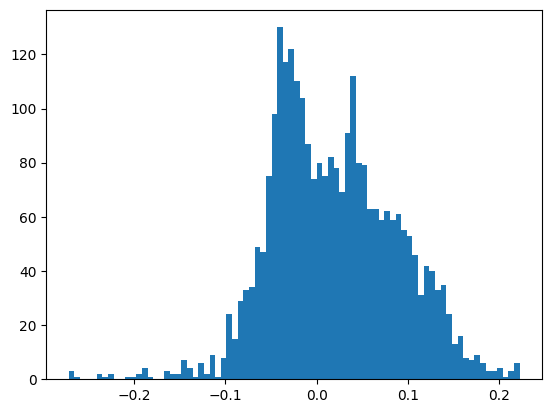

In [6]:
plt.hist(correlations, bins = 80);

In [7]:
new_df = df_copy[correlations[(correlations > 0.1) | (correlations < -0.1)].index]
new_df

,ect,hou,enron,s,gas,deal,meter,hpl,corp,d,...,fda,formula,corel,tm,constitutes,porn,symbol,reform,plain,ff
0,1,0,0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,24,27,1,95,1,0,0,0,1,39,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,2,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,36,0,2,1,0,0,21,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,19,2,0,3,0,0,11,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,0,0,18,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0
5168,11,3,1,101,5,0,0,0,0,56,...,0,0,0,0,0,0,0,0,0,1
5169,1,0,0,11,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
5170,1,0,0,37,0,1,0,0,0,9,...,0,0,0,0,0,0,0,0,0,1


In [8]:
x = new_df.to_numpy()
y = df["Prediction"].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4137, 440)
(1035, 440)
(4137,)
(1035,)


In [10]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model = DecisionTreeClassifier(criterion='gini',max_depth=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
accuracy_score(y_pred, y_test), accuracy_score(y_pred_train, y_train)

(0.9178743961352657, 0.9688179840464104)

In [11]:
f1_score(y_pred, y_test), f1_score(y_pred_train, y_train)

(0.8500881834215167, 0.9470660648338121)

In [12]:
train_score, test_score = [], []

for i in range(1,30):
    model = DecisionTreeClassifier(criterion='gini',max_depth=i)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    train_score.append(f1_score(y_pred_train, y_train))
    test_score.append(f1_score(y_pred, y_test))


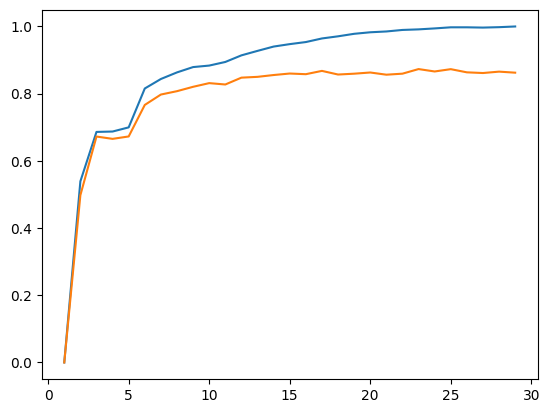

In [13]:
plt.plot(list(range(1,30)), train_score)
plt.plot(list(range(1,30)), test_score)
# 11 

In [14]:
new_df1 = df_copy[correlations[(correlations > 0.01) | (correlations < -0.01)].index]
new_df1

x1 = new_df1.to_numpy()
y1 = df["Prediction"].to_numpy()

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,
                                                    y1,
                                                    test_size=0.2,
                                                    random_state=0)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(4137, 2504)
(1035, 2504)
(4137,)
(1035,)


In [15]:
df_copy.shape

(5172, 2764)

In [16]:
train_score1, test_score1 = [], []

for i in range(1,30):
    model = DecisionTreeClassifier(criterion='gini',max_depth=i)
    model.fit(X_train1, y_train1)

    y_pred = model.predict(X_test1)
    y_pred_train = model.predict(X_train1)
    train_score1.append(f1_score(y_pred_train, y_train1))
    test_score1.append(f1_score(y_pred, y_test1))

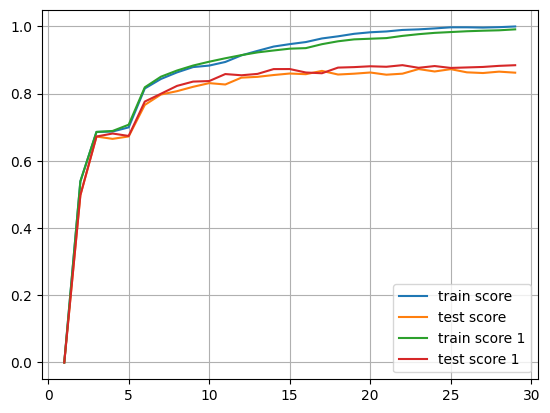

In [17]:
plt.plot(list(range(1,30)), train_score, label = "train score")
plt.plot(list(range(1,30)), test_score, label = "test score")
plt.plot(list(range(1,30)), train_score1, label = "train score 1")
plt.plot(list(range(1,30)), test_score1, label = "test score 1")

plt.grid()
plt.legend()